# Randomly Generated Sales Data Analysis

Project and Data from: [here](https://github.com/KeithGalli/Pandas-Data-Science-Tasks)

## Importing Libraries:

In [1]:
# Importing Standard Libraries:

#Standard Data Imports [i.e. Data Manipulation, etc..]
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Standard Plotting Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Modifcation to seaborn background
sns.set_style('whitegrid')

#Standard Stats Library
from scipy import stats

# Cammand for showing plots in jupyter notebooks
%matplotlib inline

## Importing Data:

In [10]:
# Importing Data:

#reading single month of data in to jupyter
raw_data = pd.read_csv('.\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv')

In [11]:
raw_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


#### Task 1: How do you get and merge multiple .csv files into 1 DataFrame.

For list directory methods: [here](https://www.geeksforgeeks.org/python-list-files-in-a-directory/)

In [2]:
# Import os library
import os

In [3]:
# Get the list of names for the .csv data:

#generate list of names
file_names = os.listdir('.\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data')

#show lsit
file_names

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

Create a way to loop through the file_names list and read files into a DataFrame.

In [4]:
# FOR loop for reading file names and importing data:

#empty DataFrame
all_sales_data = DataFrame()

#FOR loop
for file in file_names:
    #use file name to append it to file path
    file_path = '.\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\' + file
    
    #read data into temporary dataframe
    df_temporary = pd.read_csv(file_path)
    
    #take dataframe and concatenate it with all_sales_data dataframe
    all_sales_data = pd.concat([all_sales_data, df_temporary])

In [5]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [30]:
# Check that the last row is the last row of the September 2019 .csv file
check_data = pd.read_csv('.\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_September_2019.csv')

In [31]:
check_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


Data matches, therefore, I think we are good to go with the merged dataset

## Data Overview: 

In [6]:
# All the data is in - all_sales_data

# Check what missing data we have
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [34]:
# Preview of Data and Columns
all_sales_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


Missing Data:

    - it looks like we are missing about 500 entries from each columns.
    - these columns might look similar to index 1 of the all_sales_data dataframe, where it is just a Null row.
    - we will need to varify this and remove all these rows if this is the case.
    
Columns Name Ambiguity:

    - all the column names make sense.
    
Initial Thoughts on Data:

    1.) Order Date will probably need to be separated and changed to a date type
    2.) if we want any information from the Purchase Address columns, we will need to separate the column into its parts.
    3.) if an order has multiple different products on it, it will split into multiple columns with same order id and date time
    4.) data type will probably pose a problem if not handled.

## Questions:

Every good Data Analysis Project starts with good questions. Therefore, this section will be deticated to formulating these questions.

General Questions about the WHY:

    1.) What would this data be used for in this company? [i.e. what function of the business would be using this]
        The core business functions are:
            - Sales
            - Marketing
            - Operations/Fulfillment
            - Customer Sucess
         
        The auxiliary business functions are:
            - Finance
            - HR
            - etc.
            
Therefore, after looking at the data, the business is probably some type of tech marketplace. It's unclear if this is a brick & mortor or an e-commerce brand, but this suggests that the operations of the business are procurement and distribution of physical tech products.

Furthermore, the data provided does not have any detailed financial variables [i.e. cost, margin], or any delivery time data. Therefore, in my mind, this sugguests that most of the information will be used for Sales, and Marketing teams. With a flavour of hot products/sales for the finance and operations departments.
            
    2.) What is the story that we would be telling with this data, in the context of the business?
        - In general, the problem we are trying to solve is, what products are doing well, when are they doing well, and where are they doing well.
        - and how will this change the companies strategy for marketing the products they offer.
    
High level business questions related to the data:

    1.) What was the best month for sales? How much was earned that month?
    2.) What city sold the most product?
    3.) What time should we display advertisements to maximize the likelihood of customer’s buying product?
    4.) What products are most often sold together?
    5.) What product sold the most? Why do you think it sold the most?

## Overview of Analysis:

High level business questions related to the data:

    1.) What was the best month for sales? How much was earned that month?
        - Graphs = bar: month vs. total sales, bar: month vs. quatity [is there seasonality]
        - Numbers = total sales for each month
        - Cleaning Needed:
            - pull month out of Order Date -  and converting data type to datetime
            - find total revenue of an order item because of the possibility of multiple items ordered.
            
    2.) What city sold the most product?
        - Graphs = bar: city vs. quantity, bar: city vs. total sales
        - Cleaning Needed:
            - Pull the city out of the Purchase Address column.
            
    3.) What time should we display advertisements to maximize the likelihood of customer’s buying product?
        - Graphs = not 100% sure here, probably a bar, or a line, but I wonder is a scatter plot could work here.
        - Definition: What is the definition of maximize the likeihood of a consumer buying a product?
            - Initial thought would be that it is around the time that people are buying products?
    
    4.) What products are most often sold together?
        - Logic = what orders has multiple line items
        - concat the products as a pairing and the count them
    
    5.) What product sold the most? Why do you think it sold the most?
        - Graphs = bar: product vs. quatity.

## Data Cleaning:

Steps for Data Cleaning:

For Nulls:

    1.) Check to see how many rows are full of nulls. Drop all completely null rows.
    2.) Check to see if the discrepancy is removed.
    
For Data Types:

    1.) Convert Price Each -> float
    2.) Conver Quantity Ordered -> int
    3.) Conver Order Date -> Datetime

In [18]:
# Checking number of total rows vs. non-null rows:
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


Looks like there are a total of 186850 rows and 186305 are not null.

In [30]:
all_sales_data[all_sales_data.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
# Dropping the NaN rows -  final count of rows should be 186305
all_sales_data.dropna(inplace = True)

In [20]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Rows have dropping to 186305, therefore, rows with all NaN values have been dropped.

In [21]:
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


No missing data.

In [38]:
all_sales_data['Quantity Ordered'] = pd.to_numeric(all_sales_data['Quantity Ordered'])

ValueError: Unable to parse string "Quantity Ordered" at position 517

In [45]:
# Trying to find what the error is
all_sales_data.loc[519]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,237174,Wired Headphones,1,11.99,08/28/19 15:31,"300 8th St, Los Angeles, CA 90001"
519,296156,Lightning Charging Cable,1,14.95,12/10/19 20:30,"150 Lake St, Austin, TX 73301"
519,150996,AAA Batteries (4-pack),1,2.99,02/19/19 14:21,"179 Pine St, New York City, NY 10001"
519,141741,Bose SoundSport Headphones,1,99.99,01/19/19 18:56,"93 Cherry St, Boston, MA 02215"
519,223410,Apple Airpods Headphones,1,150,07/06/19 15:49,"504 8th St, New York City, NY 10001"
519,210419,Wired Headphones,1,11.99,06/10/19 09:33,"753 Meadow St, San Francisco, CA 94016"
519,162496,AA Batteries (4-pack),1,3.84,03/27/19 11:55,"68 West St, Atlanta, GA 30301"
519,194585,20in Monitor,1,109.99,05/12/19 20:29,"186 Jackson St, San Francisco, CA 94016"
519,279294,USB-C Charging Cable,1,11.95,11/21/19 14:40,"455 14th St, San Francisco, CA 94016"


In [42]:
# Find all the rows that are just the titles
all_sales_data[all_sales_data['Quantity Ordered'] == "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [46]:
# Remove the rows that are the titles to replace the dataframe
all_sales_data = all_sales_data[all_sales_data['Quantity Ordered'] != "Quantity Ordered"]

In [48]:
all_sales_data.loc[519]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,237174,Wired Headphones,1,11.99,08/28/19 15:31,"300 8th St, Los Angeles, CA 90001"
519,296156,Lightning Charging Cable,1,14.95,12/10/19 20:30,"150 Lake St, Austin, TX 73301"
519,150996,AAA Batteries (4-pack),1,2.99,02/19/19 14:21,"179 Pine St, New York City, NY 10001"
519,141741,Bose SoundSport Headphones,1,99.99,01/19/19 18:56,"93 Cherry St, Boston, MA 02215"
519,223410,Apple Airpods Headphones,1,150,07/06/19 15:49,"504 8th St, New York City, NY 10001"
519,210419,Wired Headphones,1,11.99,06/10/19 09:33,"753 Meadow St, San Francisco, CA 94016"
519,162496,AA Batteries (4-pack),1,3.84,03/27/19 11:55,"68 West St, Atlanta, GA 30301"
519,194585,20in Monitor,1,109.99,05/12/19 20:29,"186 Jackson St, San Francisco, CA 94016"
519,279294,USB-C Charging Cable,1,11.95,11/21/19 14:40,"455 14th St, San Francisco, CA 94016"
519,259854,Google Phone,1,600,10/05/19 09:20,"777 10th St, Boston, MA 02215"


Looks like we have removed all the rows that were just the column names. We know should be able to convert the 'Quantity Ordered' column to a number.

In [49]:
# Converting 'Quality Ordered' to a number
all_sales_data['Quantity Ordered'] = pd.to_numeric(all_sales_data['Quantity Ordered'])

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\1464765432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data['Quantity Ordered'] = pd.to_numeric(all_sales_data['Quantity Ordered'])


In [51]:
# Confirm that columns is now an int data type
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.0+ MB


In [52]:
# Convert Price Each column to floats
all_sales_data['Price Each'] = all_sales_data['Price Each'].astype('float64')

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\524124012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data['Price Each'] = all_sales_data['Price Each'].astype('float64')


In [53]:
# Confirm that columns is now a float data type
all_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.0+ MB


As mentioned at the top of the cleaning section we will probably want the Order Date column in a datetime data type, but I think there are a couple of manipulations that will benefit from having the Order Date as a string. Therefore, we will tackle the datetime convert later, if it comes up.

## Analysis & Visuals

    1.) What was the best month for sales? How much was earned that month?
        - Graphs = bar: month vs. total sales, bar: month vs. quatity [is there seasonality?]
        - Numbers = total sales for each month
        - Cleaning Needed:
            - pull month out of Order Date -  and converting data type to datetime
            - find total revenue of an order item because of the possibility of multiple items ordered.

In [54]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


What do we need?

    1.) a column that just has the month in it.
    2.) a total sales column.

In [63]:
# Parse the Order Date column to get the month into a month column:
all_sales_data['Month'] = all_sales_data['Order Date'].str[0:2]

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\2588883581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data['Month'] = all_sales_data['Order Date'].str[0:2]


In [64]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [65]:
# Convert the Month to a number
all_sales_data['Month'] = pd.to_numeric(all_sales_data['Month'])

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\3509688389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data['Month'] = pd.to_numeric(all_sales_data['Month'])


In [68]:
# Create a Price Total column
all_sales_data['Price Total'] = all_sales_data['Quantity Ordered'] * all_sales_data['Price Each']

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\1969789312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data['Price Total'] = all_sales_data['Quantity Ordered'] * all_sales_data['Price Each']


In [86]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [90]:
# Get the total sales amount by grouping and aggregation
df_month_and_price_total = all_sales_data[['Month', 'Price Total']]

In [92]:
df_total_monthly_sales = df_month_and_price_total.groupby('Month', as_index = False).sum()

In [93]:
df_total_monthly_sales

,Month,Price Total
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


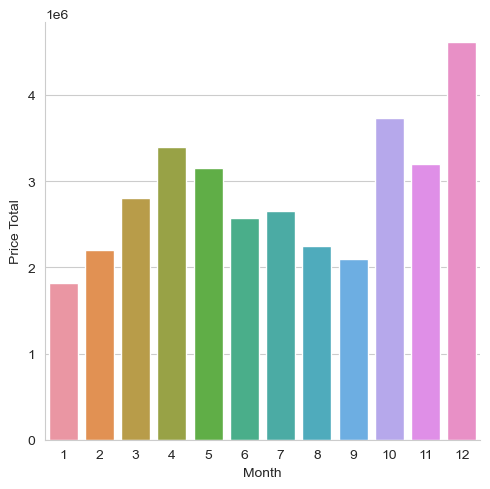

In [95]:
# Plot x = Month vs. y = Total Sales
sns.catplot(data = df_total_monthly_sales, x = 'Month', y = 'Price Total', kind = 'bar')

OBERSERVATION 1.1 - The best month for sales was December by a far margin, and the total sales for that month was $4,613,443.34.

    2.) What city sold the most product?
        - Graphs = bar: city vs. quantity, bar: city vs. total sales
        - Cleaning Needed:
            - Pull the city out of the Purchase Address column.

#### Data Cleaning for Q2:

In [109]:
# Split the Purchase Address by Address, City, State and Zip Code
all_sales_data[['Street Address', 'City','State/Zip Code']] = all_sales_data['Purchase Address'].str.split(',', expand = True)

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\3657755308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data[['Street Address', 'City','State/Zip Code']] = all_sales_data['Purchase Address'].str.split(',', expand = True)


In [110]:
all_sales_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State/Zip Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,381 Wilson St,San Francisco,CA 94016
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,668 Center St,Seattle,WA 98101
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,790 Ridge St,Atlanta,GA 30301
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,915 Willow St,San Francisco,CA 94016
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,83 7th St,Boston,MA 02215


In [108]:
'''
need to play around this assigning techquie more
all_sales_data.loc[1,['Street Address', 'City','State/Zip Code']] = all_sales_data['Purchase Address'].str.split(',', expand = True)
'''


"\nneed to play around this assigning techquie more\nall_sales_data.loc[1,['Street Address', 'City','State/Zip Code']] = all_sales_data['Purchase Address'].str.split(',', expand = True)\n"

Two things:

    1.) We probably want to also separate the State and Code into separate columns
    2.) When looking at the Purchase Address column, we notice that there are whitespaces before the City, as well as before the State. Therefore, we want to strip this whitespaces before moving forward.

In [112]:
# Split the State/Zip Code column on whitespace, and drop the unsplit column:
all_sales_data[['Whitespace','State','Zip Code']] = all_sales_data['State/Zip Code'].str.split(' ', expand = True)

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\1409570652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data[['Whitespace','State','Zip Code']] = all_sales_data['State/Zip Code'].str.split(' ', expand = True)
C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\1409570652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data[['Whitespace','State','Zip Code']] = all_sales_data['State/Zip Code'].str.split(' ', expand = True)
C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\140957

In [113]:
# Show the DataFrame
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State/Zip Code,Whitespace,State,Zip Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,840 Highland St,Los Angeles,CA 90001,,CA,90001
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,216 Dogwood St,San Francisco,CA 94016,,CA,94016
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,220 12th St,San Francisco,CA 94016,,CA,94016
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,511 Forest St,San Francisco,CA 94016,,CA,94016


In [117]:
# Drop the Whitespace column and the State/Zip Code column
all_sales_data.drop('State/Zip Code', axis = 1, inplace = True)

'''
all_sales_data.drop(['State/Zip Code','Whitespace'], axis = 1, inplace = True)

would be the all in one drop, but we already dropped the whitespace column, therefore, it was throwing an error
'''

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\1203608998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data.drop('State/Zip Code', axis = 1, inplace = True)


"\nall_sales_data.drop(['State/Zip Code','Whitespace'], axis = 1, inplace = True)\n\nwould be the all in one drop, but we already dropped the whitespace column, therefore, it was throwing an error\n"

In [118]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State,Zip Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,840 Highland St,Los Angeles,CA,90001
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,216 Dogwood St,San Francisco,CA,94016
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,220 12th St,San Francisco,CA,94016
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,511 Forest St,San Francisco,CA,94016


In [121]:
# Strip the whitespace from the City column
all_sales_data.loc[:,'City'] = all_sales_data['City'].str.strip()

In [122]:
all_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State,Zip Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,840 Highland St,Los Angeles,CA,90001
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,216 Dogwood St,San Francisco,CA,94016
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,220 12th St,San Francisco,CA,94016
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,511 Forest St,San Francisco,CA,94016


#### Plotting for Q2:

NOTE - before plotting it would make sense to clarify the question, because 'sold the most product' is a little ambiguous. The way the question is asked, suggests that we want to know which city sold the most units of product. This is starkly different that which city has the most sales because of big ticket items like phones. Therefore, we will graph both because we think they are both useful to have.

KEEP IN MIND THAT THE CITY MIGHT BE A DUPLICATE BECAUSE OF DIFFERENT STATE

ALSO YOU COULD USE AN .APPLY() LAMDA FUNCTION TO GET THE SAME RESULT AS YOU DID.

In [125]:
# Group and Aggregate a city and quantity df
df_city_product_quantity = all_sales_data[['City','Quantity Ordered']]

df_city_product_total = df_city_product_quantity.groupby('City', as_index = False).sum()

In [126]:
df_city_product_total

,City,Quantity Ordered
0,Atlanta,16602
1,Austin,11153
2,Boston,22528
3,Dallas,16730
4,Los Angeles,33289
5,New York City,27932
6,Portland,14053
7,San Francisco,50239
8,Seattle,16553


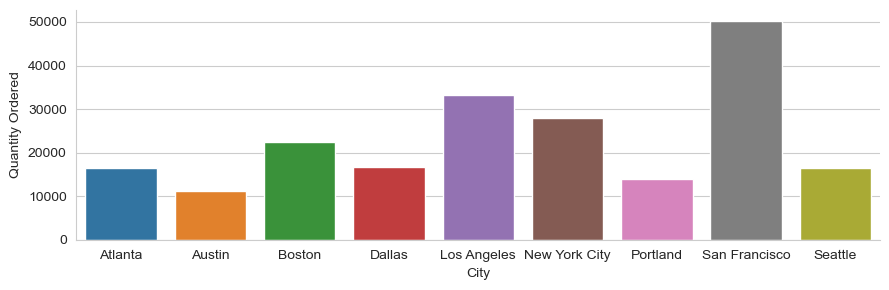

In [132]:
# Plot the city vs. quantity graph
sns.catplot(data = df_city_product_total, x = 'City', y = 'Quantity Ordered', kind = 'bar', aspect = 3, height = 3)

OBSERVATION 2.1 - Based on the above graph and table, we can see the San Francisco sold the most units of product, at approximately 50,000 units. Let see if this changes based on sales.

In [136]:
# Group and Aggregate a city and total sales df
df_city_sales = all_sales_data[['City','Price Total']]

df_city_sales_total = df_city_sales.groupby('City', as_index = False).sum()

df_city_sales_total

,City,Price Total
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


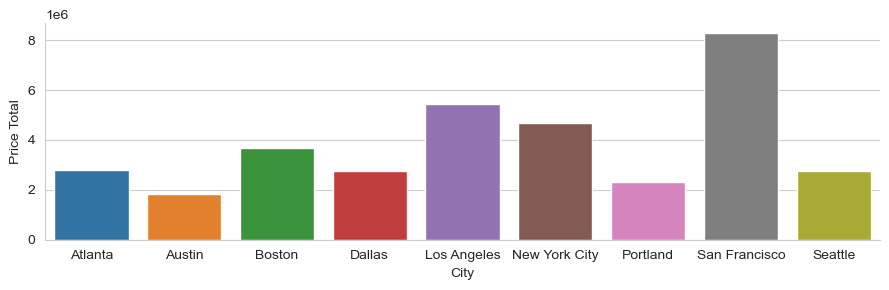

In [137]:
# Plot the city vs. total sales graph
sns.catplot(data = df_city_sales_total, x = 'City', y = 'Price Total', kind = 'bar', aspect = 3, height = 3)

    3.) What time should we display advertisements to maximize the likelihood of customer’s buying product?
        - Graphs = not 100% sure here, probably a bar, or a line, but I wonder is a scatter plot could work here.
        - Definition: What is the definition of maximize the likeihood of a consumer buying a product?
            - Initial thought would be that it is around the time that people are buying products

THOUGHTS AND LOGIC:

    - making the assumption that the time where someone bought something correlates to the best time to advertise. Then we would simply separate out the time from the date, probably bin the times into hours, and count how many orders happened within each hour.
    - the more interesting analysis would be with data that we don't have [i.e.]:
        - does time of purchase actually correlate to when someone is seeing an advertisement?
        - does day actually have an big impact than time?
        
    - either way, the logic would follow that we need to split the date and time column
    - split the hours and minutes
    - bin the hours and maybe bin the minutes into half hour chunks
    - group the times and count quantity of purchases
    - graph time vs. quantity

In [145]:
# Split Time from Date in the Order Date column
all_sales_data[['Date','Time [24h]']]= all_sales_data['Order Date'].str.split(' ', expand = True)
'''
interesting comment on the warning. When we use .loc for a single column it works fine. BUT when we are trying to use .loc for
multiple columns it populates them with NA - look into later
'''

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\3701726554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data[['Date','Time [24h]']]= all_sales_data['Order Date'].str.split(' ', expand = True)


'\ninteresting comment on the warning. When we use .loc for a single column it works fine. BUT when we are trying to use .loc for\nmultiple columns it populates them with NA - look into later\n'

In [147]:
# Split time into Hour and Minute columns
all_sales_data[['Hour','Minute']]= all_sales_data['Time [24h]'].str.split(':', expand = True)

C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\3409570526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data[['Hour','Minute']]= all_sales_data['Time [24h]'].str.split(':', expand = True)
C:\Users\ggebu\AppData\Local\Temp\ipykernel_15348\3409570526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data[['Hour','Minute']]= all_sales_data['Time [24h]'].str.split(':', expand = True)


Let's not worry about minute binning for now, and see what the hour distribution looks like.

In [153]:
# Group and Aggregate Time and Quantity Ordered
df_hour_purchased = all_sales_data[['Hour','Quantity Ordered']]

In [154]:
df_hour_purchased

,Hour,Quantity Ordered
0,08,2
2,22,1
3,14,1
4,14,1
5,09,1
...,...,...
11681,20,3
11682,16,1
11683,07,1
11684,17,1


In [155]:
df_total_purchased_per_hour = df_hour_purchased.groupby('Hour', as_index = False).sum()

In [156]:
df_total_purchased_per_hour

,Hour,Quantity Ordered
0,00,4428
1,01,2619
2,02,1398
3,03,928
4,04,937
5,05,1493
6,06,2810
7,07,4556
8,08,7002
9,09,9816


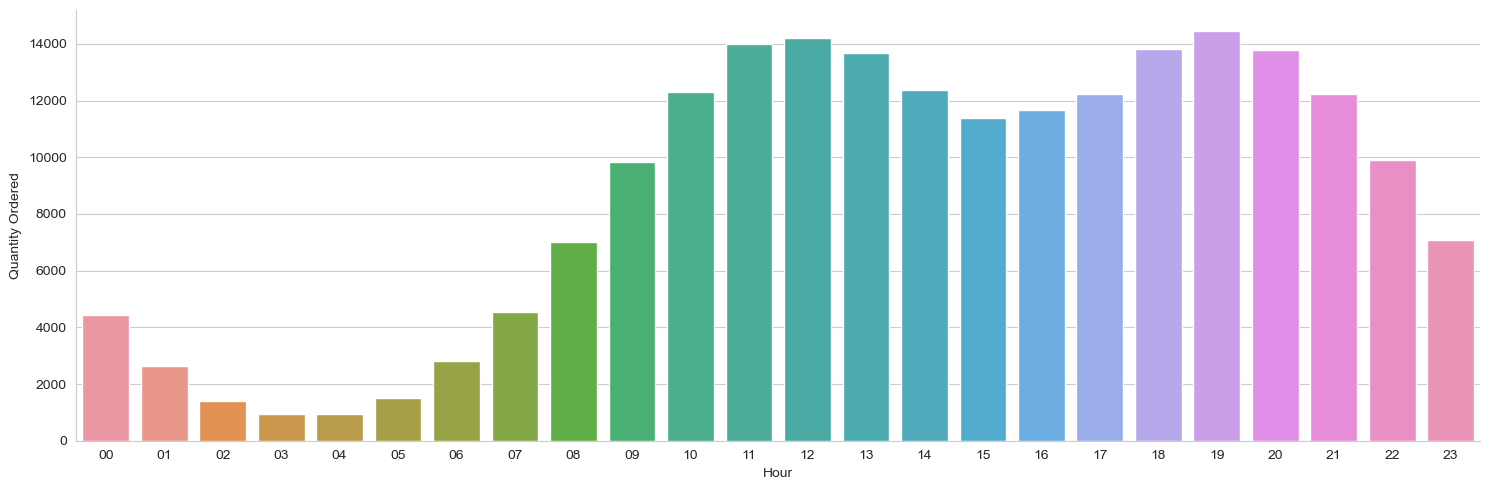

In [158]:
# Plot Time vs. Quantity Purchased
sns.catplot(data = df_total_purchased_per_hour, x = 'Hour', y = 'Quantity Ordered', kind = 'bar', aspect = 3)

OBSERVATION 3.1 - Based on the above graph, it looks like the best times to advertise is approaching noon and 7pm.

    4.) What products are most often sold together?
        - Logic = what orders has multiple line items
        - concat the products as a pairing and the count them

#### Q4 ROUGH WORK:

THOUGHTS:

    - Products that are sold together will have the same Order ID, but will be on different rows.
    - Therefore, my initial thought is to somehow group the Order IDs and merge the string or Product to get a pairing.
    - But this has a possibility of doubling up on naming convention if, for example:
        - Google Phone comes before Wired Headphones on one order and then flip flops on another order.

LOGIC:

    - Therefore, my 

In [176]:
df_temp_pairing = all_sales_data[['Order ID', 'Product']]

In [180]:
df_temp_pairing = df_temp_pairing.groupby('Order ID').sum()

In [181]:
df_temp_pairing

,Product
Order ID,
141234,iPhone
141235,Lightning Charging Cable
141236,Wired Headphones
141237,27in FHD Monitor
141238,Wired Headphones
...,...
319666,Lightning Charging Cable
319667,AA Batteries (4-pack)
319668,Vareebadd Phone


In [183]:
df_temp_pairing.loc['176560']

Product    Google PhoneWired Headphones
Name: 176560, dtype: object

What's the problem here:

    1.) Even though we can get the order with multiple products to be grouped and concatenated, we haven't figured out a way to filter out the orders with multiple products on them.
    
How might we go about solving this?

    - figure out a way to filter unique Order IDs, and then inverse it to get the df with only duplicate order IDs
    
The Actual how:

    - was able to pull the duplicated order IDs with the pandas method .duplicated() and keep all the rows that fall into the duplication.

In [189]:
df_multiple_products = all_sales_data[all_sales_data.duplicated(['Order ID'], keep = False)]

In [190]:
df_multiple_products

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State,Zip Code,Date,Time [24h],Hour,Minute
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001,04/12/19,14:38,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001,04/12/19,14:38,14,38
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA,90001,04/03/19,19:42,19,42
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA,90001,04/03/19,19:42,19,42
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA,02215,04/07/19,11:31,11,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,106 7th St,Atlanta,GA,30301,09/20/19,20:18,20,18
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,241 Highland St,Atlanta,GA,30301,09/16/19,00:25,00,25
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,241 Highland St,Atlanta,GA,30301,09/16/19,00:25,00,25
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,519 Maple St,San Francisco,CA,94016,09/30/19,13:49,13,49


Now what's the next problem:

    - Even though we have the orders with multiple products, we can't simply concat the products and graph because some product pairing might be in a different order.
    - i.e. in the product pairing Google Phone - Wired Headphones, the Google phone might come first or second.
    - finally, is there a order with more than 2 products of different types order?

Thoughts on how:

    1.) my initial thought on how to pair the orders together and ensure they are in a standard order, is to get a unique count of the products, number them and then sum the product numbers.
    2.) the .apply() a function that check the total number and matches it to a pairing.
         - this might be difficult because we would need make sure the addition is unique, and depending on the number of combinations this is not scalable.
         
Let's test:

    - how many unique combinations there are by grouping, suming, and counting the distinct entries.

In [200]:
df_testing = df_multiple_products.groupby(['Order ID']).sum()

In [197]:
df_testing['Product'].unique()

array(['USB-C Charging CableWired Headphones',
       'Apple Airpods HeadphonesAA Batteries (4-pack)',
       'Vareebadd PhoneWired Headphones',
       'Google PhoneUSB-C Charging Cable',
       'Google PhoneBose SoundSport Headphones',
       'iPhoneApple Airpods Headphones',
       'Google PhoneApple Airpods Headphones',
       'iPhoneApple Airpods HeadphonesWired Headphones',
       'USB-C Charging CableApple Airpods Headphones',
       'Lightning Charging CableWired Headphones',
       'iPhoneLightning Charging Cable',
       '27in FHD MonitorBose SoundSport Headphones',
       'iPhoneWired Headphones',
       'AA Batteries (4-pack)AAA Batteries (4-pack)',
       'Vareebadd PhoneUSB-C Charging CableWired Headphones',
       '34in Ultrawide MonitorLightning Charging Cable',
       'Lightning Charging CableBose SoundSport Headphones',
       'Google PhoneWired Headphones',
       'Apple Airpods HeadphonesLightning Charging Cable',
       'Google PhoneiPhone', '20in MonitorWired Headp

In [198]:
df_multiple_products['Product'].unique()

array(['Google Phone', 'Wired Headphones', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'Lightning Charging Cable', 'Apple Airpods Headphones',
       'ThinkPad Laptop', '34in Ultrawide Monitor', 'iPhone',
       '27in FHD Monitor', '27in 4K Gaming Monitor', 'Macbook Pro Laptop',
       'AA Batteries (4-pack)', 'Flatscreen TV', 'Vareebadd Phone',
       '20in Monitor', 'LG Dryer', 'LG Washing Machine'], dtype=object)

In [208]:
df_testing = df_multiple_products.sort_values(by = ['Order ID', 'Price Each'])

In [209]:
df_testing

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State,Zip Code,Date,Time [24h],Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.95,610 Walnut St,Austin,TX,73301,01/07/19,16:06,16,06
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.99,610 Walnut St,Austin,TX,73301,01/07/19,16:06,16,06
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,11.52,4 1st St,Los Angeles,CA,90001,01/02/19,08:25,08,25
57,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,150.00,4 1st St,Los Angeles,CA,90001,01/02/19,08:25,08,25
134,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,11.99,20 Dogwood St,New York City,NY,10001,01/10/19,11:19,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25027,319584,iPhone,1,700.00,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",12,700.00,537 Sunset St,Portland,OR,97035,12/11/19,00:30,00,30
25041,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,14.95,436 14th St,New York City,NY,10001,12/01/19,08:44,08,44
25040,319596,iPhone,1,700.00,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,700.00,436 14th St,New York City,NY,10001,12/01/19,08:44,08,44
25077,319631,Lightning Charging Cable,1,14.95,12/17/19 22:35,"363 Highland St, Austin, TX 73301",12,14.95,363 Highland St,Austin,TX,73301,12/17/19,22:35,22,35


In [211]:
df_testing = df_testing.groupby(['Order ID']).sum()

In [212]:
df_testing['Product'].unique()

array(['USB-C Charging CableWired Headphones',
       'AA Batteries (4-pack)Apple Airpods Headphones',
       'Wired HeadphonesVareebadd Phone',
       'USB-C Charging CableGoogle Phone',
       'Bose SoundSport HeadphonesGoogle Phone',
       'Apple Airpods HeadphonesiPhone',
       'Apple Airpods HeadphonesGoogle Phone',
       'Wired HeadphonesApple Airpods HeadphonesiPhone',
       'USB-C Charging CableApple Airpods Headphones',
       'Wired HeadphonesLightning Charging Cable',
       'Lightning Charging CableiPhone',
       'Bose SoundSport Headphones27in FHD Monitor',
       'Wired HeadphonesiPhone',
       'AAA Batteries (4-pack)AA Batteries (4-pack)',
       'USB-C Charging CableWired HeadphonesVareebadd Phone',
       'Lightning Charging Cable34in Ultrawide Monitor',
       'Lightning Charging CableBose SoundSport Headphones',
       'Wired HeadphonesGoogle Phone',
       'Lightning Charging CableApple Airpods Headphones',
       'Google PhoneiPhone', 'Wired Headphones20in Mo

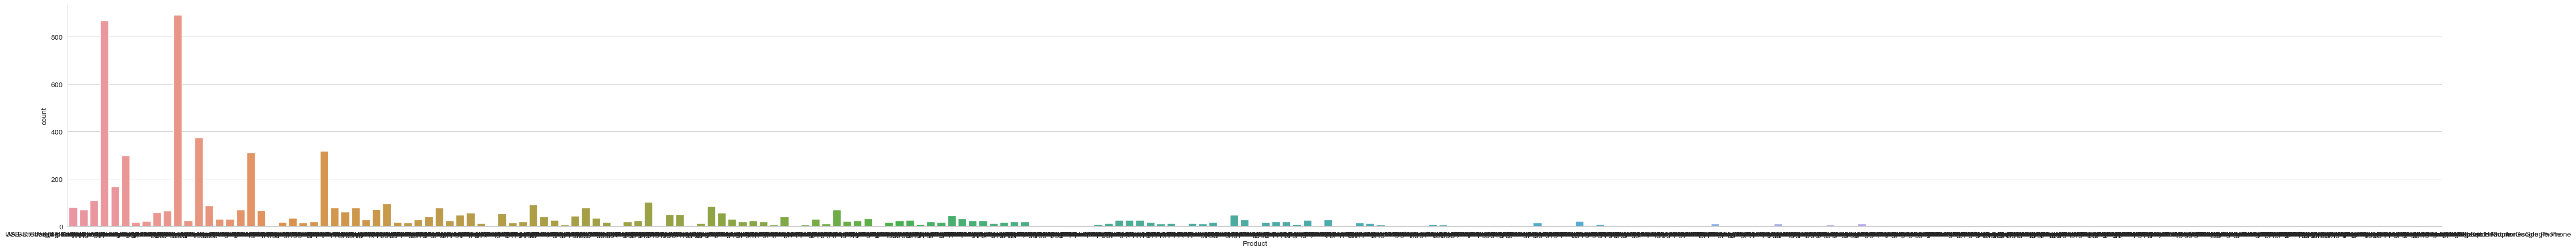

In [215]:
sns.catplot(data = df_testing, x = 'Product', kind = 'count', aspect = 10)

In [216]:
df_testing = df_testing.groupby('Product').count()

In [221]:
df_testing.sort_values(by = 'Quantity Ordered', ascending = False).head(10)

,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State,Zip Code,Date,Time [24h],Hour,Minute
Product,,,,,,,,,,,,,,
Lightning Charging CableiPhone,891,891,891,891,891,891,891,891,891,891,891,891,891,891
USB-C Charging CableGoogle Phone,868,868,868,868,868,868,868,868,868,868,868,868,868,868
Wired HeadphonesiPhone,374,374,374,374,374,374,374,374,374,374,374,374,374,374
USB-C Charging CableVareebadd Phone,318,318,318,318,318,318,318,318,318,318,318,318,318,318
Wired HeadphonesGoogle Phone,311,311,311,311,311,311,311,311,311,311,311,311,311,311
Apple Airpods HeadphonesiPhone,299,299,299,299,299,299,299,299,299,299,299,299,299,299
Bose SoundSport HeadphonesGoogle Phone,169,169,169,169,169,169,169,169,169,169,169,169,169,169
Wired HeadphonesVareebadd Phone,110,110,110,110,110,110,110,110,110,110,110,110,110,110
AA Batteries (4-pack)Lightning Charging Cable,103,103,103,103,103,103,103,103,103,103,103,103,103,103


Post rough work, I did some more research and another method to get here is to use:

    - a df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
        - which creates a new column with the Product row grouped and concated with a ','
        
    - the dropping the dupicated pairs and using different libraries:
        - from itertools import collections
        - from collections import Counter

#### // -- Q4 ROUGH WORK - COMPLETED -- //

    4.) What products are most often sold together?
        - Logic = what orders has multiple line items
        - concat the products as a pairing and the count them

#### Task 1: Filter the duplicate Order IDs into a new DataFrame.

In [246]:
df_multiple_product_orders = all_sales_data[all_sales_data.duplicated(['Order ID'], keep = False)]

In [247]:
# Show df
df_multiple_product_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State,Zip Code,Date,Time [24h],Hour,Minute
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001,04/12/19,14:38,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001,04/12/19,14:38,14,38
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA,90001,04/03/19,19:42,19,42
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA,90001,04/03/19,19:42,19,42
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA,02215,04/07/19,11:31,11,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,106 7th St,Atlanta,GA,30301,09/20/19,20:18,20,18
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,241 Highland St,Atlanta,GA,30301,09/16/19,00:25,00,25
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,241 Highland St,Atlanta,GA,30301,09/16/19,00:25,00,25
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,519 Maple St,San Francisco,CA,94016,09/30/19,13:49,13,49


#### Task 2: Solve the ordered pairing problem.

In [248]:
# Sort the Product row so that the product with the lowest price comes first
df_multiple_product_orders_sorted = df_multiple_product_orders.sort_values(by = ['Order ID', 'Price Each'])

In [249]:
# Show df
df_multiple_product_orders_sorted

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State,Zip Code,Date,Time [24h],Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.95,610 Walnut St,Austin,TX,73301,01/07/19,16:06,16,06
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.99,610 Walnut St,Austin,TX,73301,01/07/19,16:06,16,06
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,11.52,4 1st St,Los Angeles,CA,90001,01/02/19,08:25,08,25
57,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,150.00,4 1st St,Los Angeles,CA,90001,01/02/19,08:25,08,25
134,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,11.99,20 Dogwood St,New York City,NY,10001,01/10/19,11:19,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25027,319584,iPhone,1,700.00,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",12,700.00,537 Sunset St,Portland,OR,97035,12/11/19,00:30,00,30
25041,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,14.95,436 14th St,New York City,NY,10001,12/01/19,08:44,08,44
25040,319596,iPhone,1,700.00,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,700.00,436 14th St,New York City,NY,10001,12/01/19,08:44,08,44
25077,319631,Lightning Charging Cable,1,14.95,12/17/19 22:35,"363 Highland St, Austin, TX 73301",12,14.95,363 Highland St,Austin,TX,73301,12/17/19,22:35,22,35


#### Task 3: Grouping to get the product pairings.

In [250]:
df_multiple_product_orders_sorted = df_multiple_product_orders_sorted.groupby(['Order ID']).sum()

In [251]:
# Show df
df_multiple_product_orders_sorted.head(5)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State,Zip Code,Date,Time [24h],Hour,Minute
Order ID,,,,,,,,,,,,,,,
141275,USB-C Charging CableWired Headphones,2,23.94,01/07/19 16:0601/07/19 16:06,"610 Walnut St, Austin, TX 73301610 Walnut St, ...",2,23.94,610 Walnut St610 Walnut St,AustinAustin,TXTX,7330173301,01/07/1901/07/19,16:0616:06,1616,0606
141290,AA Batteries (4-pack)Apple Airpods Headphones,4,153.84,01/02/19 08:2501/02/19 08:25,"4 1st St, Los Angeles, CA 900014 1st St, Los A...",2,161.52,4 1st St4 1st St,Los AngelesLos Angeles,CACA,9000190001,01/02/1901/02/19,08:2508:25,0808,2525
141365,Wired HeadphonesVareebadd Phone,2,411.99,01/10/19 11:1901/10/19 11:19,"20 Dogwood St, New York City, NY 1000120 Dogwo...",2,411.99,20 Dogwood St20 Dogwood St,New York CityNew York City,NYNY,1000110001,01/10/1901/10/19,11:1911:19,1111,1919
141384,USB-C Charging CableGoogle Phone,2,611.95,01/03/19 00:1401/03/19 00:14,"223 Jackson St, Boston, MA 02215223 Jackson St...",2,611.95,223 Jackson St223 Jackson St,BostonBoston,MAMA,0221502215,01/03/1901/03/19,00:1400:14,0000,1414
141450,Bose SoundSport HeadphonesGoogle Phone,2,699.99,01/12/19 11:1601/12/19 11:16,"521 Park St, San Francisco, CA 94016521 Park S...",2,699.99,521 Park St521 Park St,San FranciscoSan Francisco,CACA,9401694016,01/12/1901/12/19,11:1611:16,1111,1616


#### Task 4: Count the pairs and sort to get the top 10.

In [252]:
# Grouping and Counting
df_multiple_product_orders_sorted = df_multiple_product_orders_sorted.groupby('Product').count()

In [253]:
# Sorting
df_multiple_product_orders_sorted.sort_values(by = 'Quantity Ordered', ascending = False).head(10)

,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price Total,Street Address,City,State,Zip Code,Date,Time [24h],Hour,Minute
Product,,,,,,,,,,,,,,
Lightning Charging CableiPhone,891,891,891,891,891,891,891,891,891,891,891,891,891,891
USB-C Charging CableGoogle Phone,868,868,868,868,868,868,868,868,868,868,868,868,868,868
Wired HeadphonesiPhone,374,374,374,374,374,374,374,374,374,374,374,374,374,374
USB-C Charging CableVareebadd Phone,318,318,318,318,318,318,318,318,318,318,318,318,318,318
Wired HeadphonesGoogle Phone,311,311,311,311,311,311,311,311,311,311,311,311,311,311
Apple Airpods HeadphonesiPhone,299,299,299,299,299,299,299,299,299,299,299,299,299,299
Bose SoundSport HeadphonesGoogle Phone,169,169,169,169,169,169,169,169,169,169,169,169,169,169
Wired HeadphonesVareebadd Phone,110,110,110,110,110,110,110,110,110,110,110,110,110,110
AA Batteries (4-pack)Lightning Charging Cable,103,103,103,103,103,103,103,103,103,103,103,103,103,103


5.) What product sold the most? Why do you think it sold the most?
        - Graphs = bar: product vs. quatity.

LOGIC:

    1.) Filter out the Product and Quantity Ordered Columns
    2.) Group by the Product and sum the Quantity Ordered
    3.) Plot
    4.) Observation

In [232]:
df_best_seller = all_sales_data[['Product','Quantity Ordered']]

In [234]:
# Show df
df_best_seller

,Product,Quantity Ordered
0,USB-C Charging Cable,2
2,Bose SoundSport Headphones,1
3,Google Phone,1
4,Wired Headphones,1
5,Wired Headphones,1
...,...,...
11681,AAA Batteries (4-pack),3
11682,iPhone,1
11683,iPhone,1
11684,34in Ultrawide Monitor,1


In [254]:
# Group and Sum
df_best_seller.groupby('Product', as_index = False).sum().sort_values(by = 'Quantity Ordered', ascending = False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


In [257]:
# Create new df for plotting
df_best_seller_for_plotting = df_best_seller.groupby('Product', as_index = False).sum().sort_values(by = 'Quantity Ordered', ascending = False).head(10)

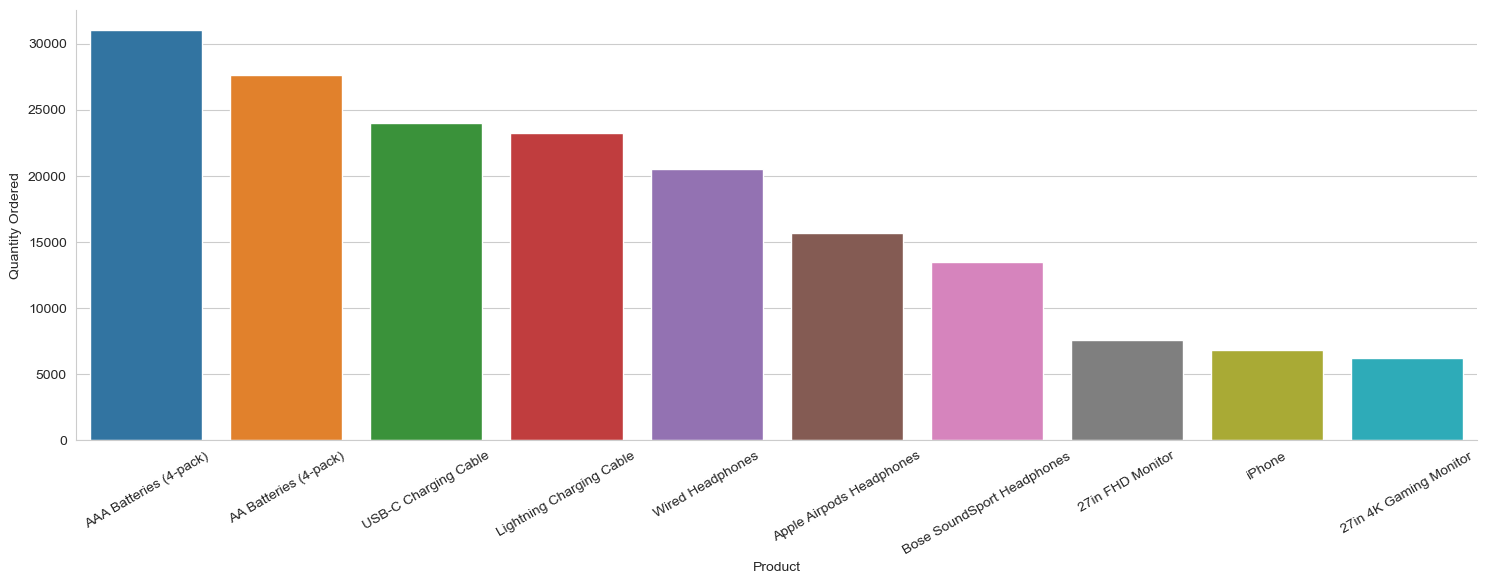

In [265]:
# Plotting
plot = sns.catplot(data = df_best_seller_for_plotting, x = 'Product', y = 'Quantity Ordered', kind = 'bar', aspect = 3)
  
plot.set_xticklabels(labels=df_best_seller_for_plotting['Product'], rotation=30)
  
# Show the plot
plt.show()

OBSERVATION 5.1 - My initial though as to why AAA Batteries (4-pack) are the best selling product are:
    
    1.) in terms of price they are one of the cheaper products.
    2.) they tend to be package together

Could overlay the price over the quantity bought to get a correlation.

# Data Analysis - COMPLETED